In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.4           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
X = df.iloc[:, :4].values
Y = df['Species'].values

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (120, 4), Y: (120,)
Test Dataset Size - X: (30, 4), Y: (30,)


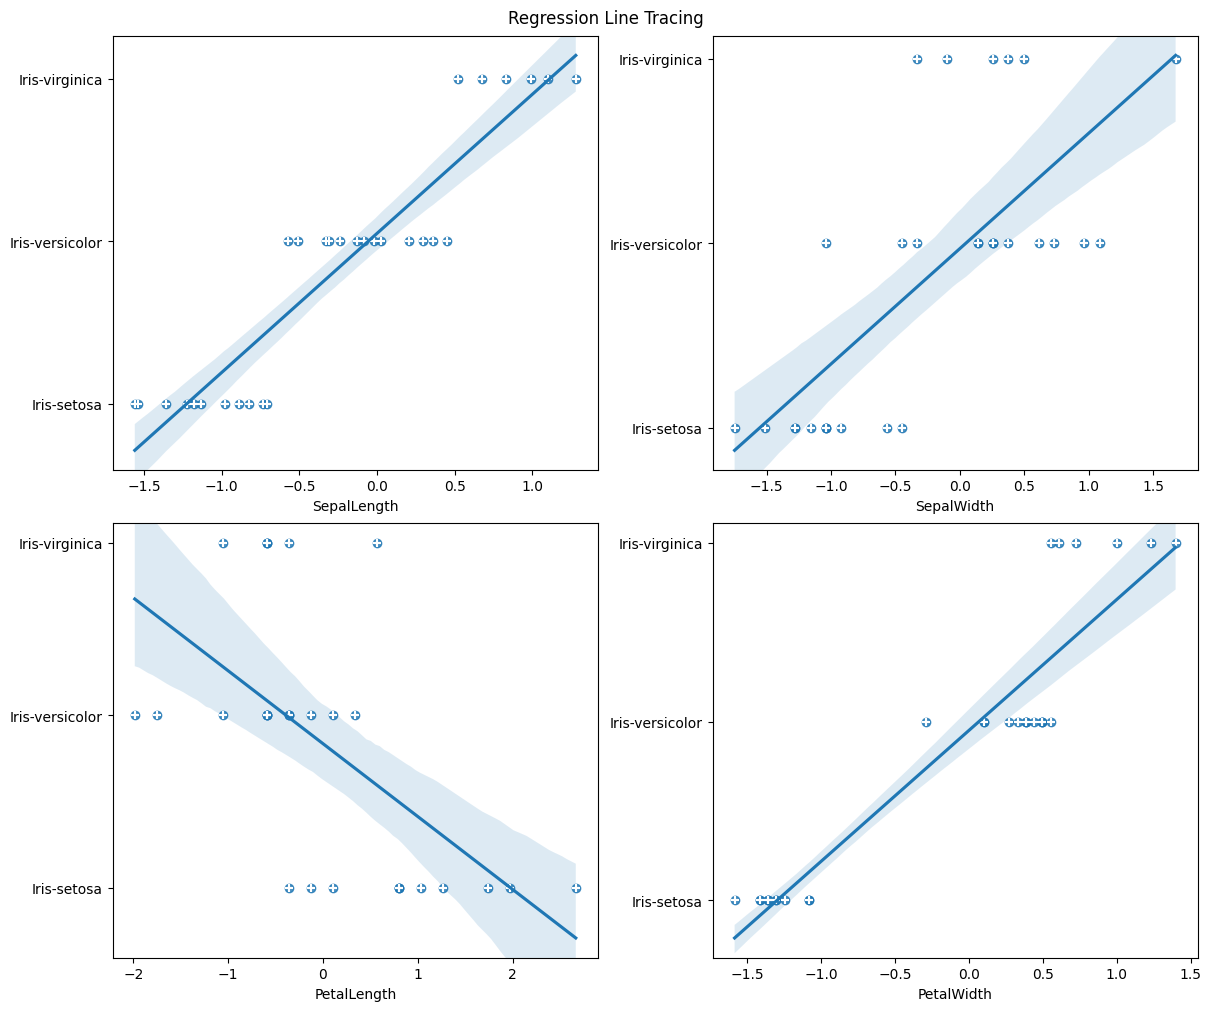

In [5]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
mapper = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
predictions_ = [mapper[i] for i in predictions]
fig, axs = plt.subplots(2, 2, figsize = (12, 10), constrained_layout = True)
fig.suptitle('Regression Line Tracing')
for i in range(4):
    x, y = i // 2, i % 2
    sns.regplot(x = X_test[:, i], y = predictions_, ax=axs[x, y])
    axs[x, y].scatter(X_test[:, i][::-1], Y_test[::-1], marker = '+', color="white")
    axs[x, y].set_xlabel(df.columns[i + 1][:-2])